# 01. PyTorch Fundamentals Exercises

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## 1. Create a straight line dataset using the linear regression formula (weight * X + bias).
- [x] Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
- [x] Split the data into 80% training, 20% testing.
- [x] Plot the training and testing data so it becomes visual.

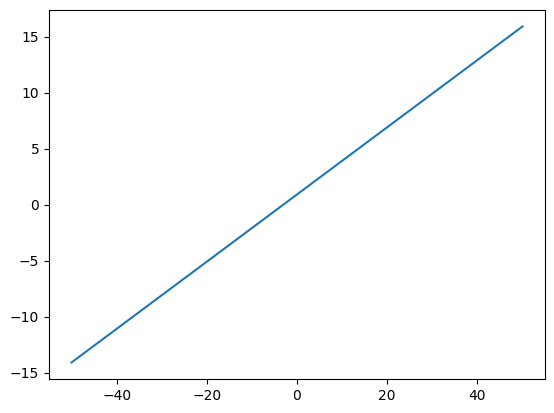

In [2]:
w = 0.3
b = 0.9

x = torch.arange(-50, 51, 1)
y = w * x + b

plt.plot(x,y)

In [3]:
ratio = 0.8
size = len(x)
point = int(size * ratio)

In [4]:
xt, yt = x[:point], y[:point]
xv, yv = x[point:], y[point:]

In [5]:
def plot_truth(xt, yt, xv, yv) :
    plt.scatter(xt, yt, color="blue", label="train")
    plt.scatter(xv, yv, color="lightblue", label="valid")
    plt.legend()
    
def plot_guess(xt, yt, xv, yp) :
    plt.scatter(xt, yt, color="blue", label="train")
    plt.scatter(xv, yp, color="red", label="guess")
    plt.legend()
    
def plot_both(xt, yt, xv, yv, yp) :
    plt.scatter(xt, yt, color="blue", label="train")
    plt.scatter(xv, yv, color="lightblue", label="valid")
    plt.scatter(xv, yp, color="red", label="guess")
    plt.legend()

def plot_loss(epoch, loss) :
    plt.plot(epoch, loss)

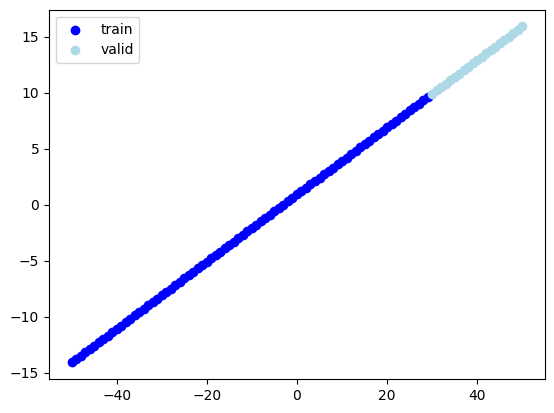

In [6]:
plot_truth(xt,yt,xv,yv)

## 2. Build a PyTorch model by subclassing nn.Module.
- [x] Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
- [x] Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
- [x] Once you've constructed the model, make an instance of it and check its state_dict().
- [x] Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [7]:
class LinearRegressionModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [8]:
model = LinearRegressionModule()
model.state_dict()

OrderedDict([('weights', tensor([-0.6243])), ('bias', tensor([1.8597]))])

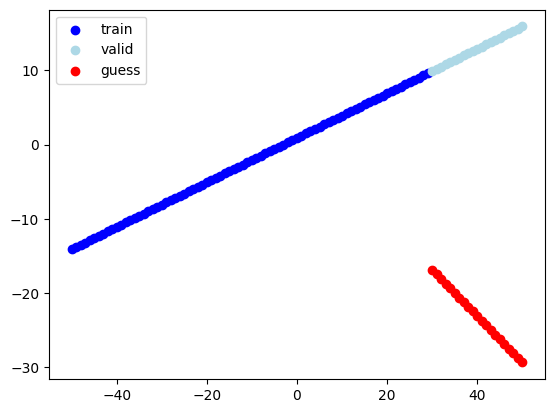

In [9]:
model.eval()
with torch.inference_mode():
    yp = model(xv)
plot_both(xt,yt,xv,yv,yp)

## 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
- [x] Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
- [x] Write a training loop to perform the appropriate training steps for 300 epochs.
- [x] The training loop should test the model on the test dataset every 20 epochs.

In [10]:
loss_func = nn.L1Loss()
learn_func = torch.optim.SGD(model.parameters(), lr=0.01)

In [11]:
epochs = []
losses = []

for epoch in range(300):
    learn_func.zero_grad()
    model.train()
    yp = model(xt)
    loss = loss_func(yp, yt)
    loss.backward()
    learn_func.step()

    if(epoch % 20 == 0):
        model.eval()
        with torch.inference_mode():
            yp = model(xv)
            distance = loss_func(yp, yv)
            epochs.append(epoch)
            losses.append(distance)

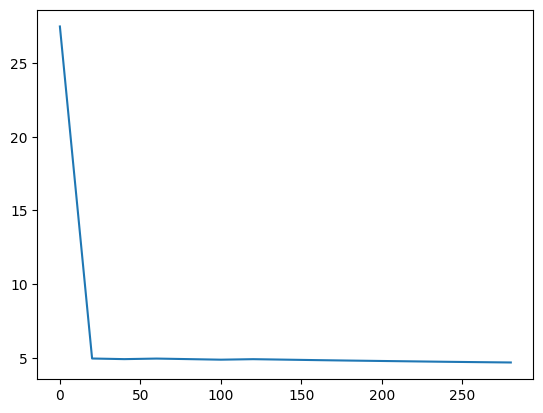

In [12]:
plot_loss(epochs, losses)

## 4. Make predictions with the trained model on the test data.
- [x] Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

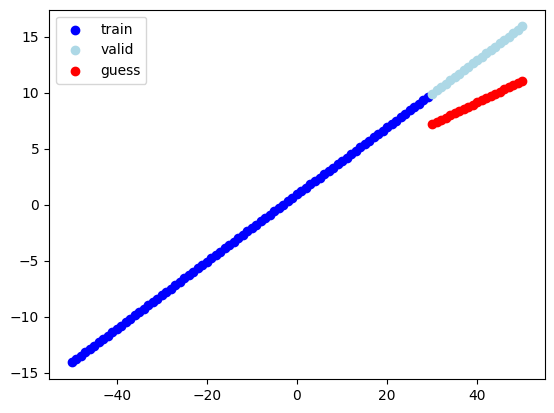

In [13]:
model.eval()
with torch.inference_mode():
    yp = model(xv)
plot_both(xt,yt,xv,yv,yp)